Importy

In [1]:
from Number import Number
from recursive_det import recursive_det
from reverse_matrix import reverse_matrix
from LU_factorisation import LU_factorise
import numpy as np
from  timeit import default_timer as timer
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from csv import reader

Generacja tablic do testowania

In [2]:
def gen_mat_of_size_2_power_k (k: int, datatype_number = True) -> np.ndarray:
    if datatype_number == True:
        return np.array([[Number(j) for j in i] for i in np.random.uniform(low=10**(-8), high=1, size = (2**k, 2**k))], dtype=Number)
    else:
        return np.array([[j for j in i] for i in np.random.uniform(low=10**(-8), high=1, size = (2**k, 2**k))])

kod do mierzenia performancu konkretnych algorytmów

In [3]:
def measure_algorithm(name, datatype_number = True):
    results = []
    for k in range(2, 10):
        mat1 = gen_mat_of_size_2_power_k(k, datatype_number)
        start = timer()
        name(mat1)
        end = timer()
        results.append([2**k, Number.ADD_counter, Number.MUL_counter,Number.ADD_counter + Number.MUL_counter, end-start])
        Number.reset_counters()
    df = pd.DataFrame(results, columns=["rozmiar", "operacje addytywne", "operacje multiplikatywne","wszystkie operacje zmiennoprzecinkowe", "czas wykonania"])
    return df

Wizualizacje zebranych danych

<br> ____________
<br> trzeba to pozmieniać noo, ale najpier zaklepać algosy, żebym wiedział który jak trzeba pomierzyć, albo nwm, może jutro klepne dalej

In [4]:
def visualise_multiplication(data_frame, name):
    print(data_frame)
    powers = data_frame["rozmiar"]
    add_cnt= data_frame["operacje addytywne"]
    mul_cnt = data_frame["operacje multiplikatywne"]
    fl_cnt = data_frame["wszystkie operacje zmiennoprzecinkowe"]
    time = data_frame["czas wykonania"]

    plt.plot(powers, add_cnt, label = f"liczba operacji addytywnych przy {name}", color="blue")
    plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy {name}", color="green")
    # plt.plot(powers, fl_cnt, label = f"liczba wszystkich operacji zmiennoprzecinkowych przy mnożeniu metodą {name}", color="red")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("liczba operacji zmiennoprzecinkowych")
    plt.legend()
    # plt.semilogy()
    plt.show()

    # plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy mnożeniu metodą {name}", color="black")
    # plt.xlabel("potęga")
    # plt.ylabel("liczba operacji multiplikatywnych")
    # plt.legend()
    # plt.semilogy()
    # plt.show()

    plt.plot(powers, time, label = f"czas wykonania {name}", color="black")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("czas wykonania [s]")
    plt.legend()
    # plt.semilogy()
    plt.show()

In [5]:
def show_plot(binet_df, strassen_df, ai_df, name, ylabel):
    powers = binet_df["rozmiar"]
    b_data= binet_df[name]
    s_data= strassen_df[name]
    ai_data= ai_df[name]
    plt.plot(powers, b_data, label = f"LU faktoryzacji", color="blue")
    plt.plot(powers, s_data, label = f"rekurencyjnego obliczania wyznacznika", color="red")
    plt.plot(powers, ai_data, label = f"odwracania macierzy", color="black")
    plt.title(f"{ylabel} ...")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel(ylabel)
    plt.legend()
    # plt.semilogy()
    plt.show()

def compare_dataframes(binet_df, strassen_df, ai_df):
    name = "operacje addytywne"
    ylabel = "liczba operacji addytywnych"
    show_plot(binet_df, strassen_df, ai_df,name, ylabel)

    name = "operacje multiplikatywne"
    ylabel = "liczba operacji multiplikatywnych"
    show_plot(binet_df, strassen_df, ai_df,name,ylabel)

    name = "wszystkie operacje zmiennoprzecinkowe"
    ylabel = "liczba wszystkich operacji zmiennoprzecinkowych"
    show_plot(binet_df, strassen_df, ai_df,name,ylabel)

    name = "czas wykonania"
    ylabel = "czas wykonania"
    show_plot(binet_df, strassen_df, ai_df,name, ylabel)

Konkretne pomiary

In [13]:
# binet_df = measure_algorithm(LU_factorise)
LU_factorise_df = pd.read_csv("LU_new.csv", header=0).drop("n", axis=1)

In [14]:
# recursive_det_df = measure_algorithm(recursive_det)
recursive_det_df = pd.read_csv("det_new.csv", header=0).drop("n", axis=1)

In [16]:
# reverse_matrix_df = measure_algorithm(reverse_matrix)
reverse_matrix_df = pd.read_csv("reverse_new.csv", header=0).drop("n", axis=1)

In [8]:
LU_factorise_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,60,51,111,0.001200
1,8,832,431,1263,0.007110
2,16,8240,3213,11453,0.054933
3,32,69764,22835,92599,0.423226
4,64,543328,159861,703189,3.556670
5,128,4040148,1115411,5155559,22.379935
6,256,29269632,7784133,37053765,158.050221
7,512,208938868,54371555,263310423,1093.819095


In [10]:
recursive_det_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,60,54,114,0.001177
1,8,832,438,1270,0.006409
2,16,8240,3228,11468,0.043480
3,32,69764,22866,92630,0.310992
4,64,543328,159924,703252,3.178278
5,128,4040148,1115538,5155686,21.205492
6,256,29269632,7784388,37054020,162.948553
7,512,208938868,54372066,263310934,1115.711659


In [12]:
reverse_matrix_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,126,102,228,0.001025
1,8,1588,726,2314,0.011059
2,16,14400,5010,19410,0.080217
3,32,114856,34542,149398,0.530120
4,64,862056,239202,1101258,5.603233
5,128,6270328,1663086,7933414,33.094046
6,256,44843400,11594370,56437770,236.112997
7,512,317722936,80967822,398690758,1749.358699


Analiza pomiarów

   rozmiar  operacje addytywne  operacje multiplikatywne  \
0        4                  60                        51   
1        8                 832                       431   
2       16                8240                      3213   
3       32               69764                     22835   
4       64              543328                    159861   
5      128             4040148                   1115411   
6      256            29269632                   7784133   
7      512           208938868                  54371555   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    111        0.001200  
1                                   1263        0.007110  
2                                  11453        0.054933  
3                                  92599        0.423226  
4                                 703189        3.556670  
5                                5155559       22.379935  
6                               37053765      

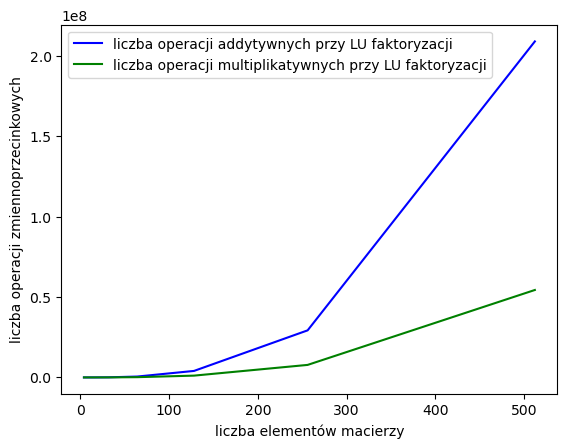

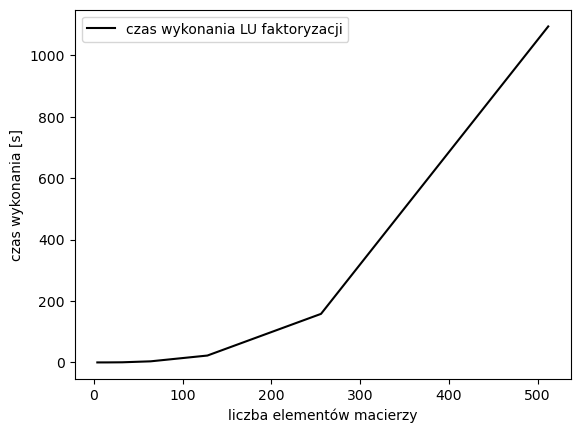

In [20]:
visualise_multiplication(LU_factorise_df, "LU faktoryzacji")

   rozmiar  operacje addytywne  operacje multiplikatywne  \
0        4                  60                        54   
1        8                 832                       438   
2       16                8240                      3228   
3       32               69764                     22866   
4       64              543328                    159924   
5      128             4040148                   1115538   
6      256            29269632                   7784388   
7      512           208938868                  54372066   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    114        0.001177  
1                                   1270        0.006409  
2                                  11468        0.043480  
3                                  92630        0.310992  
4                                 703252        3.178278  
5                                5155686       21.205492  
6                               37054020      

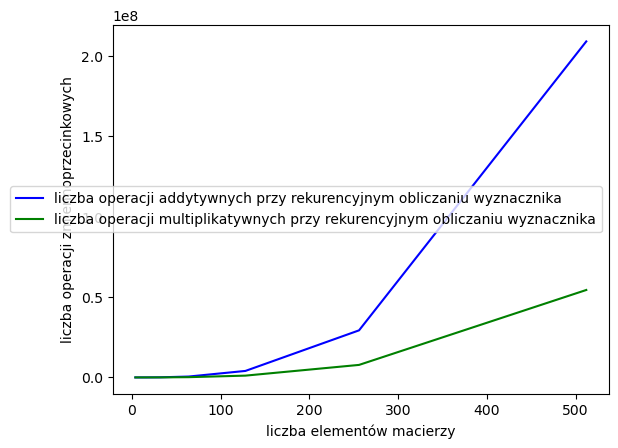

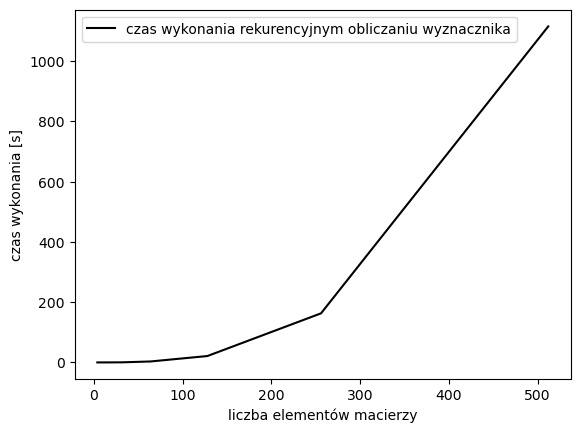

In [21]:
visualise_multiplication(recursive_det_df, "rekurencyjnym obliczaniu wyznacznika")

   rozmiar  operacje addytywne  operacje multiplikatywne  \
0        4                 126                       102   
1        8                1588                       726   
2       16               14400                      5010   
3       32              114856                     34542   
4       64              862056                    239202   
5      128             6270328                   1663086   
6      256            44843400                  11594370   
7      512           317722936                  80967822   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    228        0.001025  
1                                   2314        0.011059  
2                                  19410        0.080217  
3                                 149398        0.530120  
4                                1101258        5.603233  
5                                7933414       33.094046  
6                               56437770      

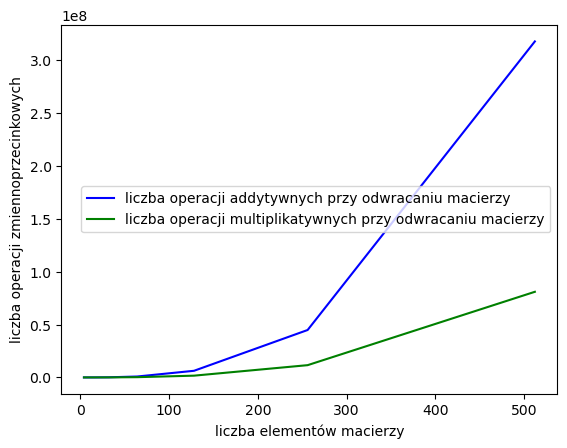

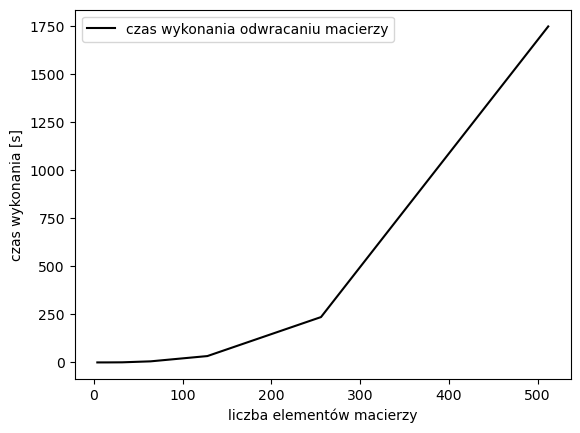

In [22]:
visualise_multiplication(reverse_matrix_df, "odwracaniu macierzy")

Szacowanie złożoność obliczeniowej

Exponent k is approximately: 2.791908349705342
contant a is approximately: 2.9847983899081668e-05


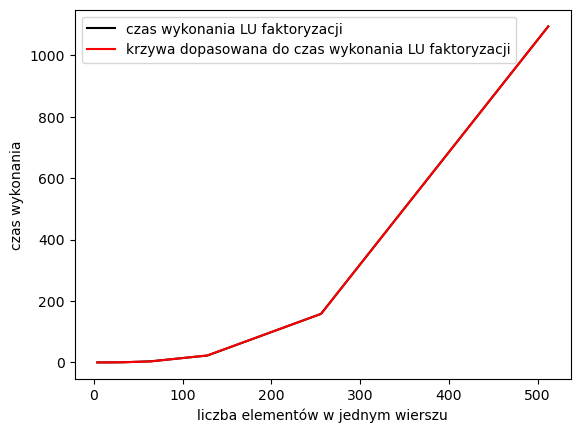

Exponent k is approximately: 2.829743317475249
contant a is approximately: 5.674551423454399


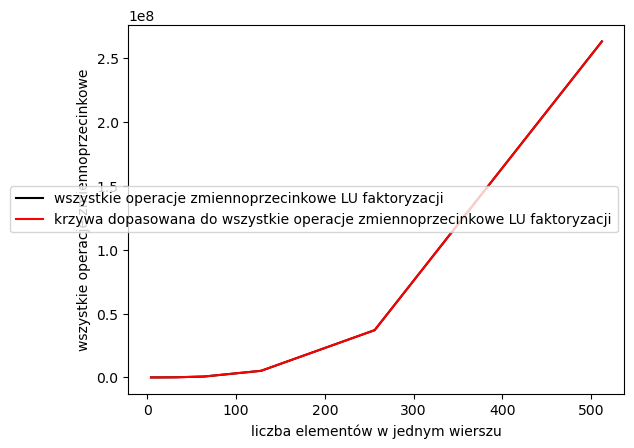

In [23]:
from math import sqrt
def fit_curve(name1, name2, dataframe):
    x_data = dataframe[name1]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

def plot_with_fit(a, k, data_frame, name1, name2, name):
    powers = data_frame[name1]
    time = data_frame[name2]

    time_spprox = [a * i ** k for i in powers]
    plt.plot(powers, time, label = f"{name2} {name}", color="black")
    plt.plot(powers, time_spprox, label = f"krzywa dopasowana do {name2} {name}", color="red")
    plt.xlabel("liczba elementów w jednym wierszu")
    plt.ylabel(name2)
    plt.legend()
    # plt.semilogy()
    plt.show()

a, k = fit_curve("rozmiar", "czas wykonania", LU_factorise_df)
plot_with_fit(a, k , LU_factorise_df, "rozmiar", "czas wykonania", "LU faktoryzacji")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", LU_factorise_df)
plot_with_fit(a, k , LU_factorise_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "LU faktoryzacji")

Exponent k is approximately: 2.781858782683751
contant a is approximately: 3.2416480577481384e-05


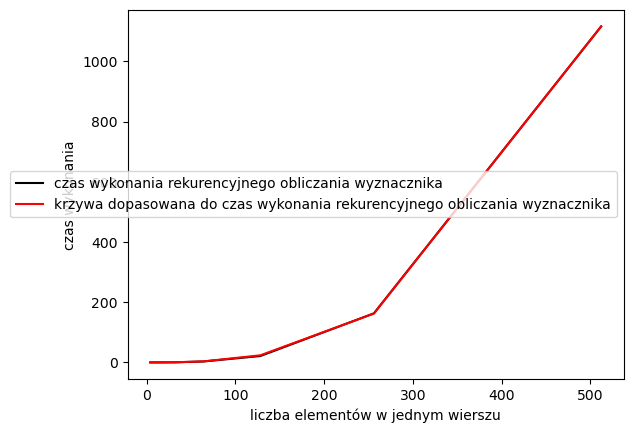

Exponent k is approximately: 2.829735397742669
contant a is approximately: 5.674842767558575


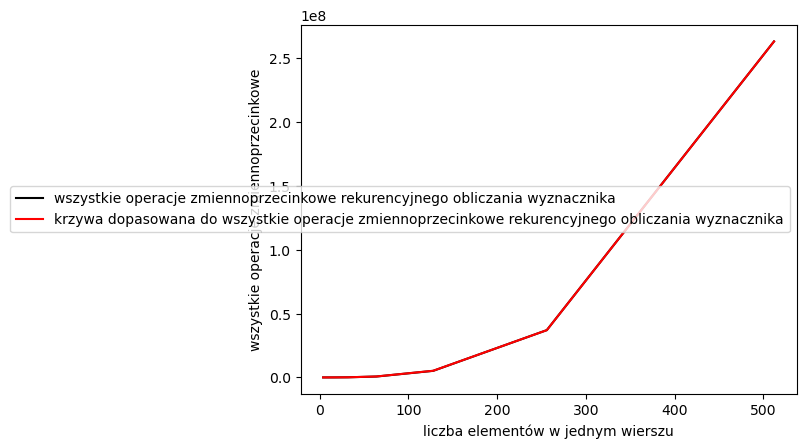

In [24]:
a, k = fit_curve("rozmiar", "czas wykonania", recursive_det_df)
plot_with_fit(a, k , recursive_det_df, "rozmiar", "czas wykonania", "rekurencyjnego obliczania wyznacznika")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", recursive_det_df)
plot_with_fit(a, k , recursive_det_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "rekurencyjnego obliczania wyznacznika")

Exponent k is approximately: 2.886973320428086
contant a is approximately: 2.6380444864125282e-05


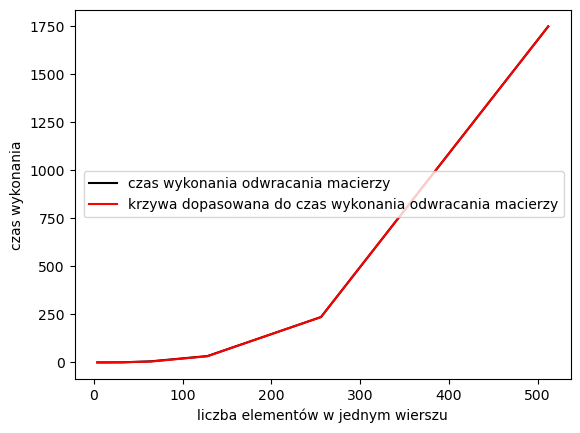

Exponent k is approximately: 2.8209589904503116
contant a is approximately: 9.076073870457861


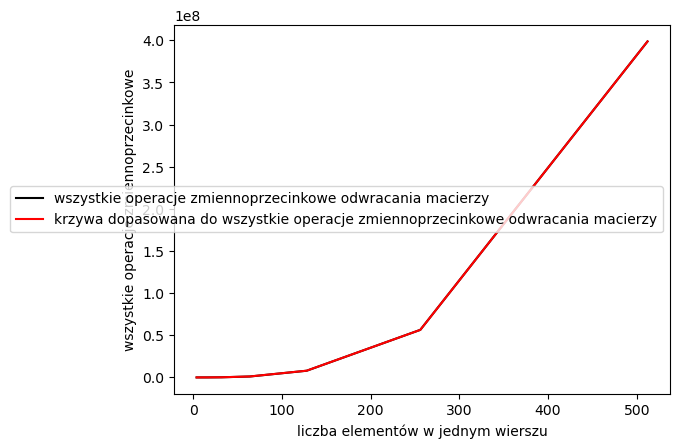

In [25]:
a, k = fit_curve("rozmiar", "czas wykonania", reverse_matrix_df)
plot_with_fit(a, k , reverse_matrix_df, "rozmiar", "czas wykonania", "odwracania macierzy")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", reverse_matrix_df)
plot_with_fit(a, k , reverse_matrix_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "odwracania macierzy")

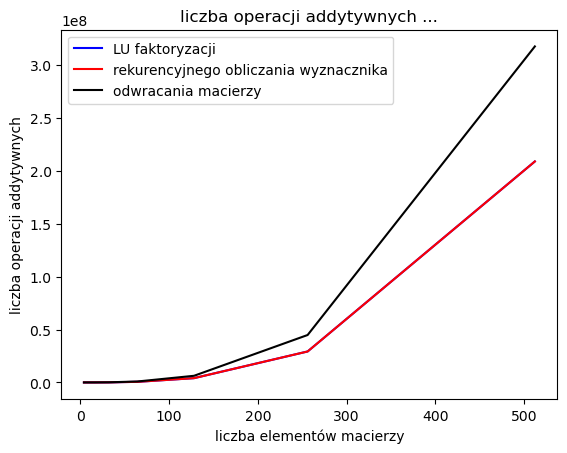

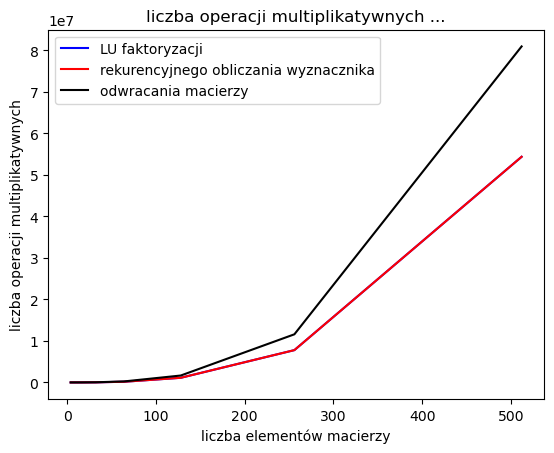

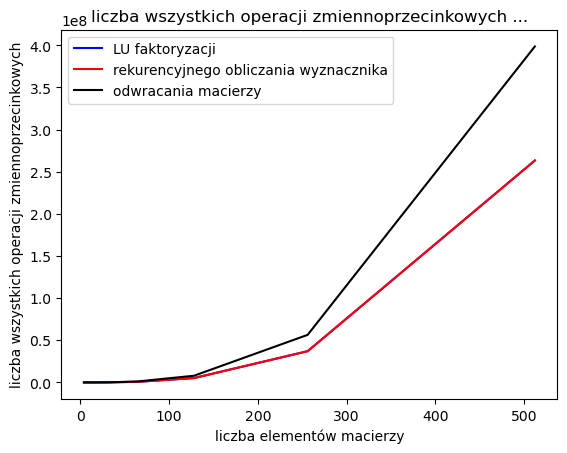

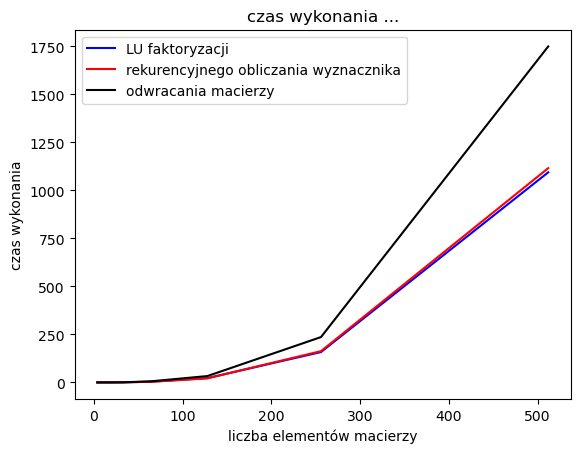

In [26]:
compare_dataframes(LU_factorise_df, recursive_det_df, reverse_matrix_df)

benchmark

binet

In [31]:
# mat1 = np.array(np.genfromtxt("./big_matrix/matrix_data_0.csv", delimiter=",", dtype=float))
# mat2 = np.array(np.genfromtxt("./big_matrix/matrix_data_3.csv", delimiter=",", dtype=float))
from scipy.linalg import lu
# def lu_np(a:np.ndarray):
#     return lu(a)
lu_built_in_df = measure_algorithm(lu, False)

In [32]:
lu_built_in_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,0,0,0,0.000240
1,8,0,0,0,0.000728
2,16,0,0,0,0.000329
3,32,0,0,0,0.000263
4,64,0,0,0,0.000251
5,128,0,0,0,0.000999
6,256,0,0,0,0.003013
7,512,0,0,0,0.012207


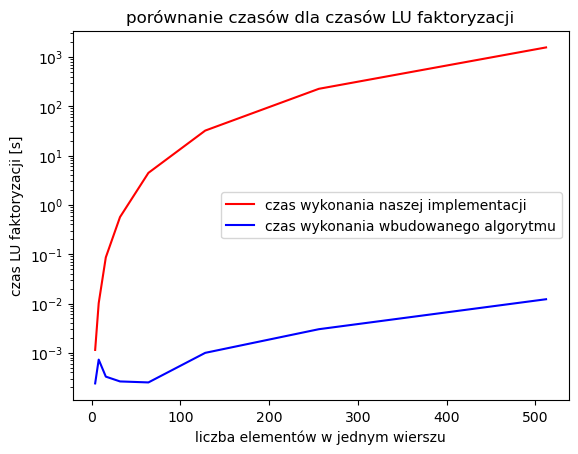

In [41]:
def compare_times(df_1, df_2, name):
    x_es = df_1["rozmiar"]
    times_1 = df_1["czas wykonania"]
    times_2 = df_2["czas wykonania"]
    plt.plot(x_es, times_1, label = f"czas wykonania naszej implementacji", color="red")
    plt.plot(x_es, times_2, label = f"czas wykonania wbudowanego algorytmu", color="blue")
    plt.xlabel("liczba elementów w jednym wierszu")
    plt.ylabel(f"czas {name} [s]")
    plt.title(f"porównanie czasów dla czasów {name}")
    plt.legend()
    plt.semilogy()
    plt.show()

compare_times(LU_factorise_df, lu_built_in_df, "LU faktoryzacji")

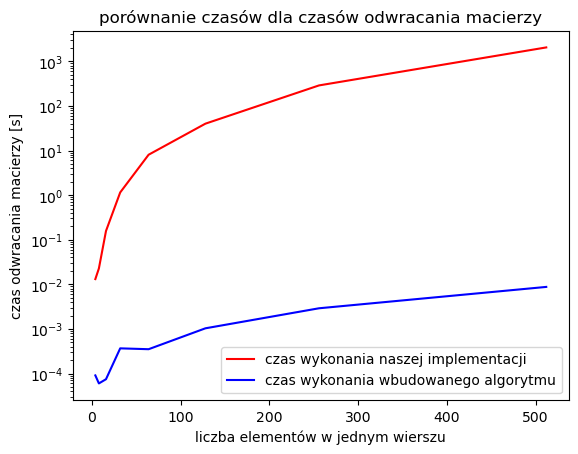

In [42]:
from numpy.linalg import inv
inv_df = measure_algorithm(inv, False)
compare_times(reverse_matrix_df, inv_df, "odwracania macierzy")

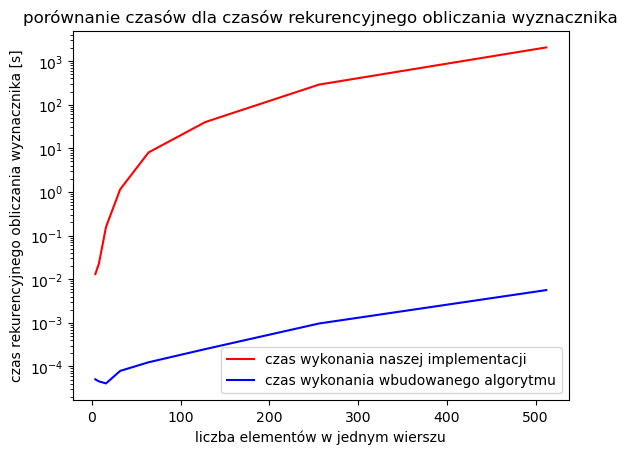

In [43]:
from numpy.linalg import det
det_df = measure_algorithm(det, False)
compare_times(reverse_matrix_df, det_df, "rekurencyjnego obliczania wyznacznika")

In [35]:
mat1 = gen_mat_of_size_2_power_k(2, False)
res = reverse_matrix(mat1)
sol = np.linalg.inv(mat1)
print("wynik numpy")
print(sol)
print("wynik naszego odwracania")
print(res)
# np.isclose(np.array(res), np.array(sol))

wynik numpy
[[-2.66627686 -2.78886994  2.45530699  3.27617722]
 [ 0.78643566 -1.89182589  2.18335355 -0.37777623]
 [ 4.1973028   4.62412877 -5.25306066 -2.58262953]
 [-3.745935   -1.30027207  3.01083834  1.73736948]]
wynik naszego odwracania
[[-2.6662768630404567 -2.788869944446736 2.4553069858462777
  3.2761772179235784]
 [0.786435657389644 -1.8918258892515931 2.1833535482731534
  -0.37777623342050504]
 [4.1973028022140895 4.62412877115851 -5.253060659923591
  -2.582629528893925]
 [-3.7459350018396975 -1.3002720672553085 3.010838339384048
  1.7373694809623903]]


In [50]:
from scipy.linalg import lu
for i in range(2,6):
    mat1 = gen_mat_of_size_2_power_k(i, False)
    res1 = recursive_det(mat1)
    sol1 = np.linalg.det(mat1)
    print("___________________\nwynik numpy")
    print(sol1)
    print("wynik wyzancznika na podstawie naszej LU faktoryzacji")
    print(res1)

___________________
wynik numpy
0.04697805916786064
wynik wyzancznika na podstawie naszej LU faktoryzacji
0.04697805916786069
___________________
wynik numpy
-0.002908248179225858
wynik wyzancznika na podstawie naszej LU faktoryzacji
-0.0029082481792261617
___________________
wynik numpy
0.10446398663137366
wynik wyzancznika na podstawie naszej LU faktoryzacji
0.10446398663137162
___________________
wynik numpy
-12.154752125197827
wynik wyzancznika na podstawie naszej LU faktoryzacji
-12.154752125030502


In [46]:
LU_factorise_old_df = pd.read_csv("LU_old.csv", header=0).drop("n", axis=1)

In [47]:
LU_factorise_old_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,62,69,131,0.001145
1,8,1018,587,1605,0.010178
2,16,10576,4341,14917,0.086105
3,32,90962,30707,121669,0.565409
4,64,712536,214533,927069,4.449985
5,128,5310786,1495715,6806501,32.035126
6,256,38514632,10435317,48949949,225.179765
7,512,275067634,72883379,347951013,1554.568073


In [48]:
def show_plot_2(binet_df, strassen_df, name, ylabel):
    powers = binet_df["rozmiar"]
    b_data= binet_df[name]
    s_data= strassen_df[name]
    plt.plot(powers, b_data, label = f"klasycznej LU faktoryzacji", color="blue")
    plt.plot(powers, s_data, label = f"zoptymalizowanej LU faktoryzacji", color="red")
    plt.title(f"{ylabel} ...")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel(ylabel)
    plt.legend()
    # plt.semilogy()
    plt.show()


def compare_dataframes_2(binet_df, strassen_df):
    name = "wszystkie operacje zmiennoprzecinkowe"
    ylabel = "liczba wszystkich operacji zmiennoprzecinkowych"
    show_plot_2(binet_df, strassen_df,name,ylabel)

    name = "czas wykonania"
    ylabel = "czas wykonania"
    show_plot_2(binet_df, strassen_df,name, ylabel)

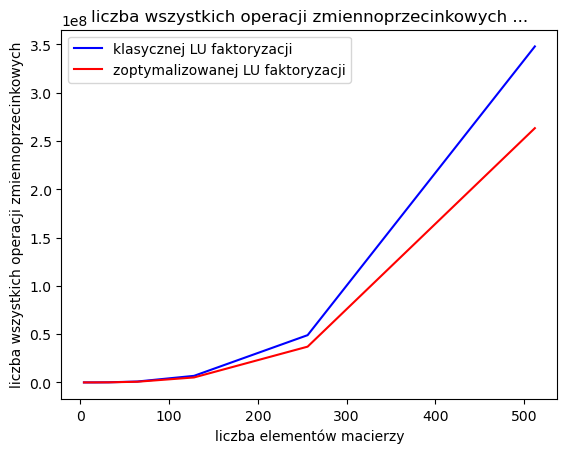

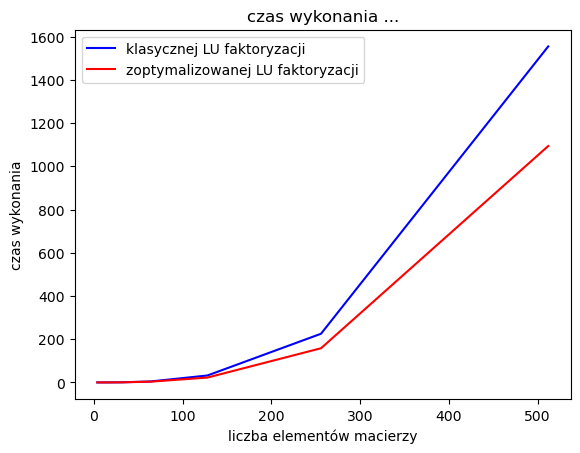

In [49]:
compare_dataframes_2(LU_factorise_old_df, LU_factorise_df)